In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 2s 0us/step


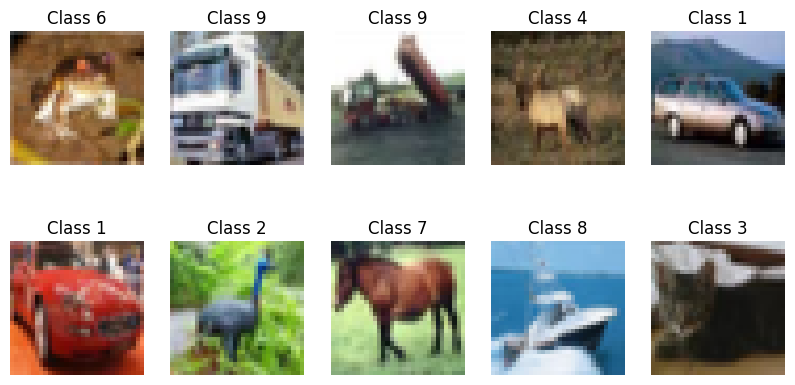

In [ ]:
# Display a few preprocessed images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class {np.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

In [ ]:
# Define a modified GoogleNet model for CIFAR-10
def inception_module(x, filters):
    # 1x1 Convolution
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 Convolution
    conv3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3)

    # 5x5 Convolution
    conv5x5 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5)

    # 3x3 MaxPooling
    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)

    # Concatenate the outputs of the filters
    concat = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool], axis=-1)
    return concat

In [ ]:
input_shape = (32, 32, 3)
input_layer = layers.Input(shape=input_shape)

x = layers.Conv2D(64, (7, 7), padding='same', activation='relu', strides=(2, 2))(input_layer)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Inception modules
x = inception_module(x, filters=[64, 128, 128, 32, 32, 32])
x = inception_module(x, filters=[128, 192, 96, 64, 64, 64])
x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully connected layers
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size = 128, validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 160s 410ms/step - loss: 1.4747 - accuracy: 0.4595 - val_loss: 1.3206 - val_accuracy: 0.5154
Epoch 2/10
391/391 [==============================] - 159s 407ms/step - loss: 1.2330 - accuracy: 0.5547 - val_loss: 1.1752 - val_accuracy: 0.5842
Epoch 3/10
391/391 [==============================] - 155s 397ms/step - loss: 1.0825 - accuracy: 0.6156 - val_loss: 1.1071 - val_accuracy: 0.6084
Epoch 4/10
391/391 [==============================] - 158s 403ms/step - loss: 0.9609 - accuracy: 0.6600 - val_loss: 1.0026 - val_accuracy: 0.6449
Epoch 5/10
391/391 [==============================] - 155s 396ms/step - loss: 0.8452 - accuracy: 0.7020 - val_loss: 0.9281 - val_accuracy: 0.6740
Epoch 6/10
391/391 [==============================] - 155s 396ms/step - loss: 0.7591 - accuracy: 0.7309 - val_loss: 0.9165 - val_accuracy: 0.6799
Epoch 7/10
391/391 [==============================] - 155s 395ms/step - loss: 0.6745 - accuracy: 0.7637 - val_loss: 0.9019 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 8s 24ms/step - loss: 0.9826 - accuracy: 0.7008
Test accuracy: 70.08%


In [ ]:
# Predict labels for a few test images
num_images_to_display = 5
test_images = test_images[:10]
predicted_labels = model.predict(test_images)

1/1 [==============================] - 0s 222ms/step


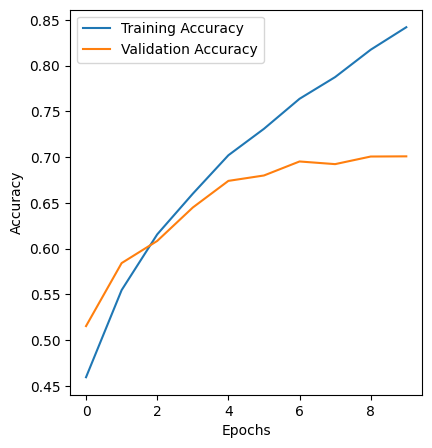

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

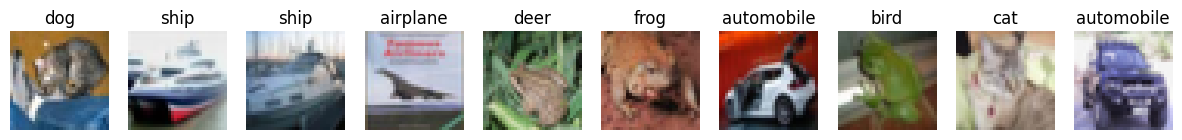

1/1 [==============================] - 0s 24ms/step


<ipython-input-15-10249c9f4681>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


1/1 [==============================] - 0s 27ms/step


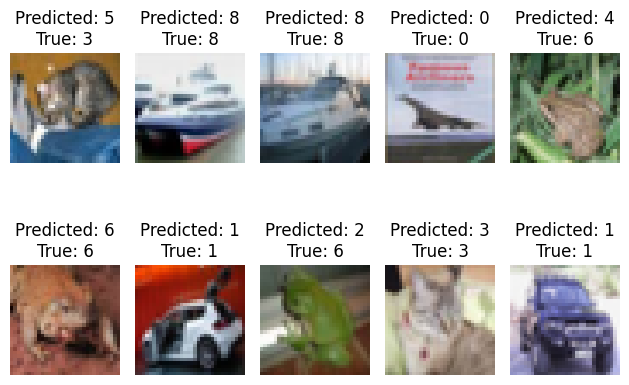

In [ ]:
# Display a few preprocessed test images with predicted labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    predicted_class_index = np.argmax(predicted_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')

plt.show()

plt.subplot(1, 2, 2)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(test_images[i], axis=0)))
    true_label = np.argmax(test_labels[i])
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()